In [2]:
import pandas as pd

In [3]:
df_limpezas = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/V_LIMPEZAS_EXECUTADAS_202510141706.csv')  
df_limpezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [4]:
df_municipios = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/ORGAO_EMPRESA_202510141615.csv')
df_municipios = df_municipios.rename(columns={'CD_ORGAO_EMPRESA': 'CD_MUNICIPIO', 'NM_ORGAO_EMPRESA': 'NM_MUNICIPIO'})
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  473 non-null    int64 
 1   NM_MUNICIPIO  473 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [5]:
df_merged = pd.merge(
    df_limpezas,
    df_municipios,
    on='CD_MUNICIPIO',  # Coluna comum para o join
    how='left'         # Usa todas as linhas de df_vistoria e adiciona as colunas de df_municipios
)
df_limpezas = df_merged
df_limpezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
 2   NM_MUNICIPIO   249 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


In [6]:
# 1. Agrupa pelo nome do município e conta o número de registros (limpezas)
# O '.size()' conta o número de linhas em cada grupo.
# O '.reset_index(name='NUMERO_DE_LIMPEZAS')' transforma o resultado em um DataFrame
# e renomeia a coluna de contagem.
contagem_limpezas = df_limpezas.groupby('NM_MUNICIPIO').size().reset_index(name='NUMERO_DE_LIMPEZAS')

# 2. Opcional: Ordena o resultado para ver os municípios com mais limpezas primeiro
contagem_limpezas = contagem_limpezas.sort_values(
    by='NUMERO_DE_LIMPEZAS',
    ascending=False
)

# 3. Exibe o resultado (se desejar)
print(contagem_limpezas)

  NM_MUNICIPIO  NUMERO_DE_LIMPEZAS
0     DESCANSO                 249


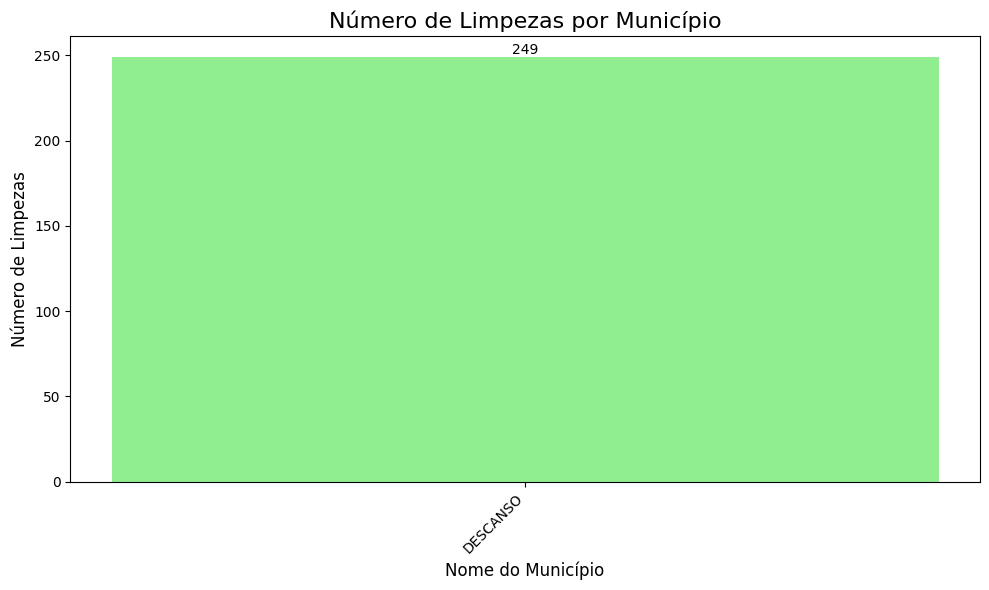

In [7]:
import matplotlib.pyplot as plt

# Supondo que 'contagem_limpezas' é o DataFrame resultante da etapa anterior
# com as colunas 'NM_MUNICIPIO' e 'NUMERO_DE_LIMPEZAS'.

# Se o seu DataFrame não tiver esses nomes de coluna, ajuste aqui:
x_col = 'NM_MUNICIPIO'
y_col = 'NUMERO_DE_LIMPEZAS'

plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico

# 1. Cria o gráfico de barras
plt.bar(contagem_limpezas[x_col], contagem_limpezas[y_col], color='lightgreen')

# 2. Adiciona título e rótulos
plt.title('Número de Limpezas por Município', fontsize=16)
plt.xlabel('Nome do Município', fontsize=12)
plt.ylabel('Número de Limpezas', fontsize=12)

# 3. Rotaciona os nomes dos municípios no eixo X para melhor visualização (se houver muitos)
plt.xticks(rotation=45, ha='right')

# 4. Adiciona os valores em cima de cada barra (para clareza)
for i, v in enumerate(contagem_limpezas[y_col]):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 5. Ajusta o layout para evitar que rótulos sejam cortados
plt.tight_layout()

# 6. Salva o gráfico (será salvo como 'limpezas_por_municipio.png')
plt.savefig('limpezas_por_municipio.png')

In [ ]:
df_limpezas['DATA_EXECUCAO'] = pd.to_datetime(df_limpezas['DATA_EXECUCAO'])
contagem_por_dia = (
    df_limpezas.groupby(df_limpezas['DATA_EXECUCAO'].dt.date)
    .size()
    .reset_index(name='QUANTIDADE_DE_LIMPEZAS')
)
contagem_por_dia.columns = ['DATA', 'QUANTIDADE_DE_LIMPEZAS']
print(contagem_por_dia)

          DATA  QUANTIDADE_DE_LIMPEZAS
0   2024-11-05                      11
1   2024-11-06                      10
2   2024-11-26                       9
3   2024-11-27                      10
4   2024-12-10                      11
5   2024-12-11                      14
6   2025-01-15                      12
7   2025-01-16                       9
8   2025-02-11                      13
9   2025-02-12                       9
10  2025-03-11                       3
11  2025-03-18                      13
12  2025-03-19                      10
13  2025-04-16                      13
14  2025-04-23                      16
15  2025-05-08                       5
16  2025-05-29                      14
17  2025-06-12                       8
18  2025-07-01                      13
19  2025-07-03                       2
20  2025-07-15                      14
21  2025-08-01                       7
22  2025-08-26                       9
23  2025-09-01                       7
24  2025-10-07           

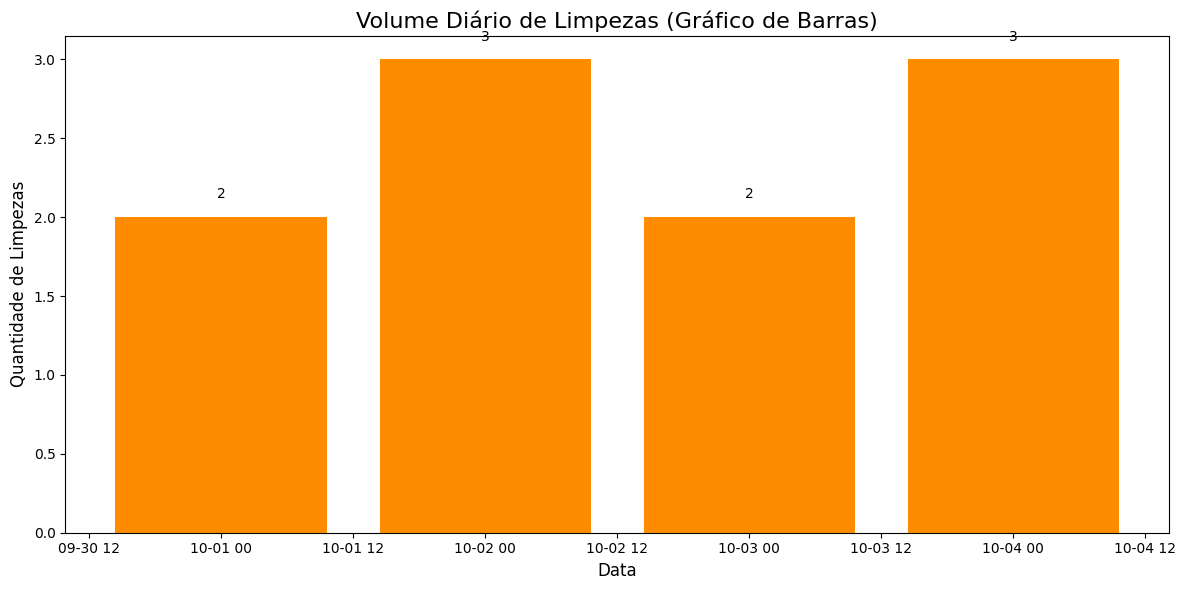

In [ ]:
# Supondo que 'contagem_por_dia' é o seu DataFrame

x_col = 'DATA'
y_col = 'QUANTIDADE_DE_LIMPEZAS'

plt.figure(figsize=(12, 6))

# 1. Cria o gráfico de barras
# Como o eixo X é data, o Matplotlib o tratará corretamente.
plt.bar(contagem_por_dia[x_col], contagem_por_dia[y_col], color='darkorange')

# 2. Adiciona título e rótulos
plt.title('Volume Diário de Limpezas (Gráfico de Barras)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Limpezas', fontsize=12)

# 3. Formata o eixo X para datas
plt.gcf().autofmt_xdate() # Ajusta o formato das datas para evitar sobreposição

# 4. Adiciona os valores nas barras
for i, v in enumerate(contagem_por_dia[y_col]):
    # Ajusta o texto ligeiramente acima da barra
    plt.text(contagem_por_dia[x_col].iloc[i], v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 5. Ajusta o layout
plt.tight_layout()

# 6. Exibe/Salva
# plt.show()
plt.savefig('limpezas_por_dia_barras.png')